In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## calender分析

In [2]:
data = pd.read_csv("datasets/Madrid-Airbnb-data/calendar.csv")
data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,167183,2021-04-15,f,$45.00,$45.00,1.0,5.0
1,6369,2021-04-15,t,$60.00,$60.00,1.0,1125.0
2,6369,2021-04-16,t,$60.00,$60.00,1.0,1125.0
3,6369,2021-04-17,t,$60.00,$60.00,1.0,1125.0
4,6369,2021-04-18,t,$60.00,$60.00,1.0,1125.0


In [3]:
# 数据处理
# 将价格改为浮点类型
data["price"] = data["price"].str.replace(r"[$,]","",regex=True).astype(np.float32)
data["adjusted_price"] = data["adjusted_price"].str.replace(r"[$,]","",regex=True).astype(np.float32)

In [4]:
# 将日期改为datatime类型并且添加week和month列
data["date"] = pd.to_datetime(data["date"])
print(data["date"][0].year, data["date"].dt.year,sep="\n\n")
# 星期几是从0开始，所以要加1
data["weekday"] = data["date"].dt.weekday+1
data["month"] = data["date"].dt.month
data["month"].head(2)

2021

0          2021
1          2021
2          2021
3          2021
4          2021
           ... 
7161251    2022
7161252    2022
7161253    2022
7161254    2022
7161255    2022
Name: date, Length: 7161256, dtype: int64


0    4
1    4
Name: month, dtype: int64

In [5]:
# 看下处理后的数据
data.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,month
0,167183,2021-04-15,f,45.0,45.0,1.0,5.0,4,4
1,6369,2021-04-15,t,60.0,60.0,1.0,1125.0,4,4


E:\app\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month'>

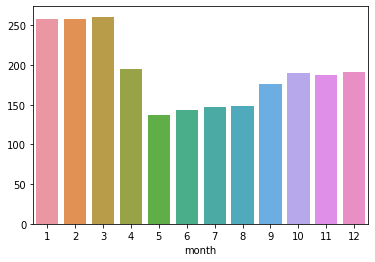

In [6]:
# 查看月份与价格的关系
month_mean_price = data.groupby("month")["price"].mean()
sns.barplot(month_mean_price.index, month_mean_price.values)

E:\app\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday'>

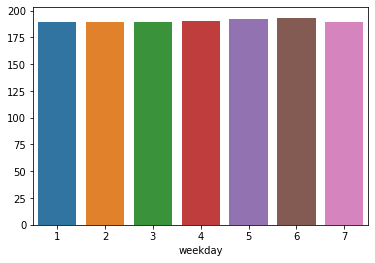

In [7]:
# 查看星期与价格的关系
weekday_mean_price = data.groupby("weekday")["price"].mean()
sns.barplot(weekday_mean_price.index, weekday_mean_price.values)

In [8]:
month_mean_price

month
1     258.362000
2     257.491669
3     260.831116
4     194.463043
5     137.011337
6     143.481293
7     147.437531
8     148.149399
9     176.380875
10    189.843430
11    186.791870
12    190.761459
Name: price, dtype: float32

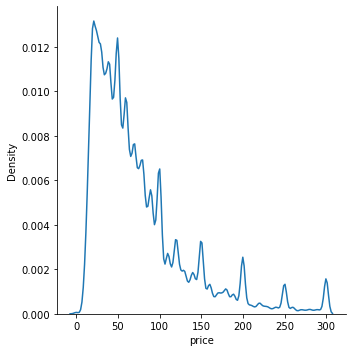

In [9]:
# 查看价格分布
sns.displot(x="price",data=data[data["price"]<=300],kind="kde")

## listings数据分析

In [10]:
data1_pre = pd.read_csv("datasets/Madrid-Airbnb-data/listings_detailed.csv")
data1_pre.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42


In [11]:
# 创建一个空的DataFrame，之后用于储存所需要的特征值
data1 = pd.DataFrame(index=range(len(data1_pre)))

In [12]:
# data1_pre数据columns太长了，如何展示所有的columns
print(type(data1_pre.columns)) #Index类
print(type(data1_pre.columns.values)) #转为np.ndarray类
data1_pre.columns.values.tolist()  #转为列表形式

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [13]:
# 将价格转为float形式
price = data1_pre["price"].apply(lambda x: x[1:].replace(",","")).astype(np.float32)
# data1新增最低消费一栏 一晚消费*最低入住天数
data1["mini_price"] = price * data1_pre["minimum_nights"]

In [14]:
# 添加设备数量一栏
data1["n_amenities"] = data1_pre["amenities"].str[1:-1].str.split(",").apply(len)

In [15]:
# 根据可以容纳人数分成"single"(1人),"couple"(2人),"Family"(3人到5人),和"group"(大于五人)
data1["accommodates_type"]=pd.cut(data1_pre["accommodates"],bins=[1,2,3,6,100],include_lowest=True,right=False,labels=["single","couple","family","group"])

In [16]:
# 还需要添加的特征
other_features=["id","host_id","listing_url","room_type","neighbourhood_group_cleansed","amenities"]
data1_others = data1_pre[other_features]
data1 = pd.concat([data1_others,data1],axis=1)

0       Private room
1       Private room
2    Entire home/apt
Name: room_type, dtype: object
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


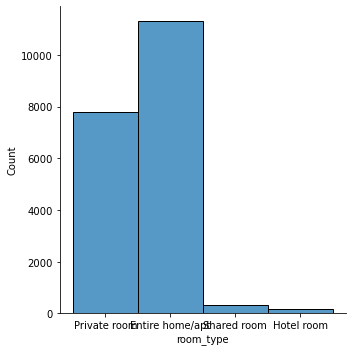

In [17]:
# 绘图——查看_房间类型的分布
print(data1["room_type"].head(3))
print(data1["room_type"].unique())
sns.displot(data1["room_type"], kind="hist")

Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: room_type, dtype: int64
----------------------------------------------------------------------------------------------------


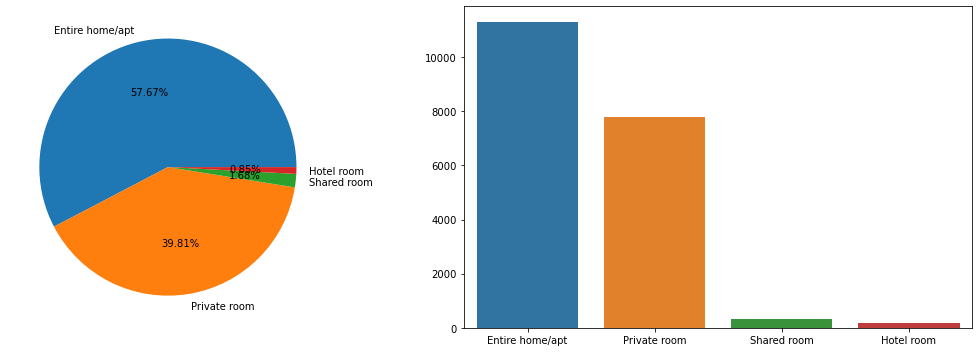

In [18]:
print(data1["room_type"].value_counts())
print("-"*100)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].pie(data1["room_type"].value_counts().values,autopct="%.2f%%",labels=data1["room_type"].value_counts().index)
sns.barplot(x= data1["room_type"].value_counts().index, y=data1["room_type"].value_counts().values,ax=axes[1])
plt.tight_layout()

In [19]:
# 绘图_社区分布
neigh = data1["neighbourhood_group_cleansed"].value_counts()
neigh.head()

Centro        8649
Salamanca     1324
Chamberí      1252
Arganzuela    1104
Tetuán         816
Name: neighbourhood_group_cleansed, dtype: int64

<AxesSubplot:>

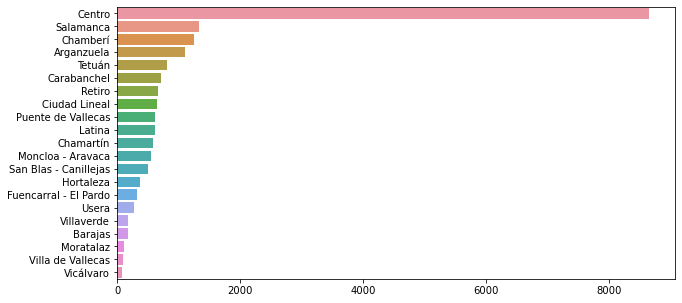

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(y=neigh.index, x=neigh.values, orient="h")

In [21]:
# 绘图_每个地区房间类型的比例
list(data1.groupby(["neighbourhood_group_cleansed","room_type"]))

[(('Arganzuela', 'Entire home/apt'),
               id    host_id                            listing_url  \
  2         23001      82175     https://www.airbnb.com/rooms/23001   
  5         28200      82175     https://www.airbnb.com/rooms/28200   
  88       336672    1716726    https://www.airbnb.com/rooms/336672   
  163      536574     447969    https://www.airbnb.com/rooms/536574   
  186      598771    2678039    https://www.airbnb.com/rooms/598771   
  ...         ...        ...                                    ...   
  19378  48798043    8321213  https://www.airbnb.com/rooms/48798043   
  19397  48839014  325540127  https://www.airbnb.com/rooms/48839014   
  19487  48976174  392345238  https://www.airbnb.com/rooms/48976174   
  19524  49053023    5700613  https://www.airbnb.com/rooms/49053023   
  19599  49157014  151861190  https://www.airbnb.com/rooms/49157014   
  
               room_type neighbourhood_group_cleansed  \
  2      Entire home/apt                   Arganzue

In [22]:
group_room = data1.groupby(["neighbourhood_group_cleansed","room_type"])\
    .size()\
    .unstack("room_type")\
    .fillna(0)\
    .apply(lambda row: row/row.sum(), axis=1)\
    .sort_values(by="Entire home/apt")

<AxesSubplot:ylabel='neighbourhood_group_cleansed'>

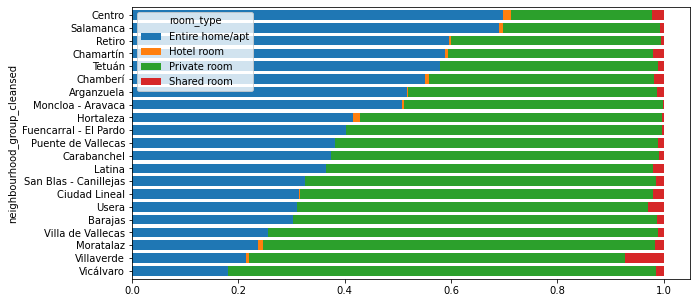

In [23]:
# 用pandas绘图
fig,ax = plt.subplots(figsize=(10,5))
group_room.plot(kind="barh",stacked=True,ax=ax,width=0.75)

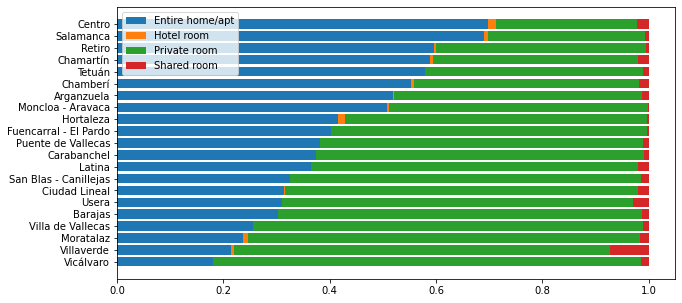

In [24]:
# 用matplotlib绘图
plt.figure(figsize=(10,5))
index=group_room.index
columns=group_room.columns
plt.barh(index,group_room.iloc[:,0])
left = group_room.iloc[:,0]
plt.barh(index,group_room.iloc[:,1],left=left)
left += group_room.iloc[:,1]
plt.barh(index,group_room.iloc[:,2],left=left)
left += group_room.iloc[:,2]
plt.barh(index,group_room.iloc[:,3],left=left)
plt.legend(columns)

In [25]:
# 房东拥有房子数量的统计
data1.groupby("host_id").size().sort_values(ascending=False)

host_id
377605855    163
28038703     113
102196656    101
276565844    101
32046323      92
            ... 
53553568       1
53586711       1
53607174       1
53617036       1
396428081      1
Length: 11325, dtype: int64

<AxesSubplot:xlabel='0', ylabel='Count'>

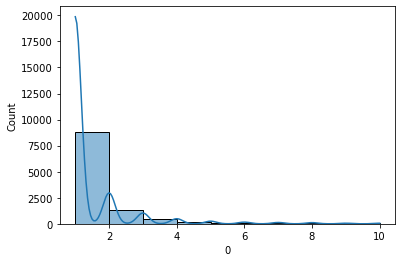

In [26]:
    # 查看拥有十套房以下的分布
data_temp = data1.groupby("host_id").size().to_frame()
sns.histplot(data_temp[data_temp[0]<=10][0],kde=True,binwidth=1)

1     8845
2     1320
5+     483
3      460
4      217
dtype: int64


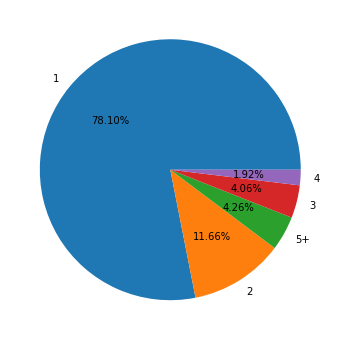

In [27]:
host_numbers = pd.cut(data1.groupby("host_id").size(),bins=[1,2,3,4,5,250],right=False,labels=["1","2","3","4","5+"]).value_counts()
print(host_numbers)
plt.figure(figsize=(6,6))
plt.pie(host_numbers.values, autopct="%.2f%%", labels=host_numbers.index)
plt.show()

## review分析

In [28]:
data2_pre = pd.read_csv("datasets/Madrid-Airbnb-data/reviews_detailed.csv",parse_dates=["date"])
data2_pre.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


<AxesSubplot:xlabel='months'>

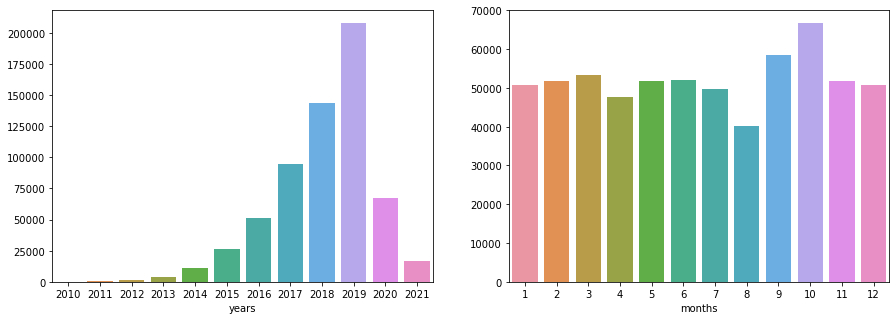

In [29]:
# 获取每一年和月份的评论数量
data2_pre["years"] = data2_pre["date"].dt.year
data2_pre["months"] = data2_pre["date"].dt.month
years_comments = data2_pre.groupby(by=["years"]).size()
months_comments = data2_pre.groupby(by=["months"]).size()

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=years_comments.index,y=years_comments.values,ax=axes[0])
sns.barplot(x=months_comments.index,y=months_comments.values,ax=axes[1])

In [30]:
# 把以上连张图放一张图上
data2 = data2_pre.groupby(by=["years","months"]).size().unstack(1)
data2

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2010,NaN,NaN,2.0,3.0,5.0,3.0,1.0,1.0,5.0,5.0,6.0,3.0
2011,4.0,5.0,8.0,7.0,24.0,29.0,49.0,27.0,47.0,68.0,49.0,46.0
2012,56.0,53.0,74.0,110.0,177.0,155.0,146.0,132.0,190.0,227.0,173.0,127.0
2013,143.0,152.0,219.0,328.0,396.0,383.0,377.0,296.0,487.0,567.0,448.0,406.0
2014,462.0,388.0,609.0,752.0,825.0,845.0,879.0,798.0,1346.0,1517.0,1129.0,1158.0
2015,1091.0,1135.0,1534.0,2018.0,2509.0,2275.0,2261.0,1927.0,2913.0,3476.0,2561.0,2523.0
2016,2449.0,2652.0,3243.0,3875.0,5050.0,4330.0,4208.0,3641.0,5513.0,6580.0,4943.0,4439.0
2017,5181.0,5155.0,6019.0,8435.0,9436.0,9374.0,7790.0,6295.0,10142.0,10969.0,8006.0,8131.0
2018,8392.0,8605.0,9983.0,12678.0,13478.0,12203.0,12776.0,9499.0,13864.0,16982.0,13001.0,12376.0


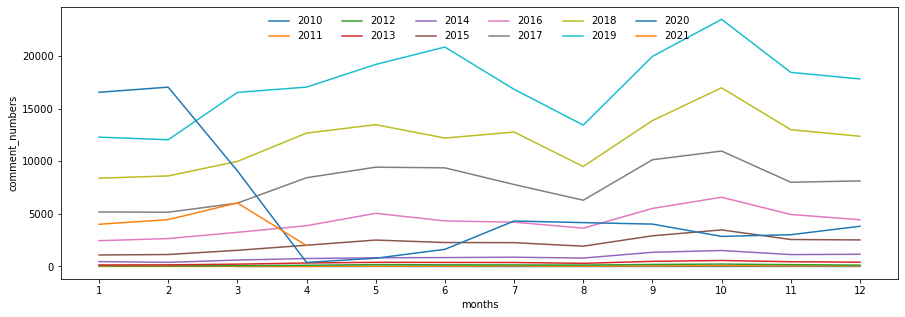

In [31]:
fig,ax = plt.subplots(figsize=(15,5))
for index in data2.index:
    line_data = data2.loc[index]
    line_data.dropna(inplace=True)
    sns.lineplot(x=line_data.index,y=line_data.values,ax=ax)
ax.legend(data2.index,ncol=len(data2.index)//2,frameon=False,loc="upper center")
ax.set_xticks(range(1,13))
ax.set_xlabel("months")
ax.set_ylabel("comment_numbers")
plt.show()

In [32]:
data1_pre

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,https://www.airbnb.com/rooms/49185822,20210413152844,2021-04-15,Habitación con TV con Netflix en Lavapiés,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/59be7fbb-28b3...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19614,49186179,https://www.airbnb.com/rooms/49186179,20210413152844,2021-04-16,Habitación con TV con Netflix en Gaztambide,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/62d916ba-bea9...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19615,49187258,https://www.airbnb.com/rooms/49187258,20210413152844,2021-04-15,Habitación con TV con Netflix en Chamberí,"*facturas incluidas (gas, electricidad, Intern...",NaN,https://a0.muscache.com/pictures/be000599-44d6...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19616,49187471,https://www.airbnb.com/rooms/49187471,20210413152844,2021-04-15,Habitación con TV con Netflix en Goya,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/ffbecf79-945e...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN


## 机器学习_房间价格预测

In [33]:
data1_pre["property_type"].unique()

array(['Private room in apartment', 'Entire apartment',
       'Private room in house', 'Entire loft', 'Entire condominium',
       'Private room in guest suite', 'Private room in chalet',
       'Entire serviced apartment', 'Entire house',
       'Private room in condominium', 'Private room in bed and breakfast',
       'Private room in townhouse', 'Entire guest suite',
       'Shared room in apartment', 'Shared room in hut',
       'Room in aparthotel', 'Entire bungalow', 'Private room in loft',
       'Shared room in bed and breakfast', 'Dome house',
       'Shared room in loft', 'Casa particular', 'Shared room in hostel',
       'Private room', 'Private room in floor', 'Entire place',
       'Private room in casa particular', 'Room in serviced apartment',
       'Shared room in house', 'Room in boutique hotel',
       'Private room in guesthouse', 'Private room in hostel',
       'Room in hotel', 'Entire chalet', 'Entire bed and breakfast',
       'Private room in serviced apartmen

In [34]:
# 筛选出对价格有影响的特征
features1 = [
"neighbourhood_group_cleansed",
"accommodates",
"price",
]

In [35]:
# 数据预处理
data_ml1_pre = data1_pre[features1]
data_ml1_pre = data_ml1_pre.dropna(axis=0)
data_ml1_pre["price"] = data_ml1_pre["price"].str.replace(r"[$,]","").astype(np.float32)
data_ml1_pre.reset_index(inplace=True)
data_ml1_pre.drop("index",axis=1,inplace=True)
data_ml1_pre.info(),data_ml1_pre["price"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  19618 non-null  object 
 1   accommodates                  19618 non-null  int64  
 2   price                         19618 non-null  float32
dtypes: float32(1), int64(1), object(1)
memory usage: 383.3+ KB


<ipython-input-35-23f9cd88ee38>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_ml1_pre["price"] = data_ml1_pre["price"].str.replace(r"[$,]","").astype(np.float32)


(None,
 0        60.0
 1        31.0
 2        50.0
 3        92.0
 4        26.0
          ... 
 19613    23.0
 19614    21.0
 19615    22.0
 19616    19.0
 19617    20.0
 Name: price, Length: 19618, dtype: float32)

In [36]:
# target_features切割
features_ml1_pre = data_ml1_pre.drop("price",axis=1)
target = np.array(data_ml1_pre["price"])
features_ml1_pre.head()

,neighbourhood_group_cleansed,accommodates
0,Chamartín,2
1,Latina,1
2,Arganzuela,6
3,Centro,3
4,Arganzuela,1


In [37]:
# 数据预处理_对离散型数据进行one_hot编码，对连续型数据进行标准化
dispersion_features_list = [
    "neighbourhood_group_cleansed",
]
dispersion_features = features_ml1_pre[dispersion_features_list]
dispersion_features = pd.get_dummies(dispersion_features)
dispersion_features.head(2)

,neighbourhood_group_cleansed_Arganzuela,neighbourhood_group_cleansed_Barajas,neighbourhood_group_cleansed_Carabanchel,neighbourhood_group_cleansed_Centro,neighbourhood_group_cleansed_Chamartín,neighbourhood_group_cleansed_Chamberí,neighbourhood_group_cleansed_Ciudad Lineal,neighbourhood_group_cleansed_Fuencarral - El Pardo,neighbourhood_group_cleansed_Hortaleza,neighbourhood_group_cleansed_Latina,...,neighbourhood_group_cleansed_Moratalaz,neighbourhood_group_cleansed_Puente de Vallecas,neighbourhood_group_cleansed_Retiro,neighbourhood_group_cleansed_Salamanca,neighbourhood_group_cleansed_San Blas - Canillejas,neighbourhood_group_cleansed_Tetuán,neighbourhood_group_cleansed_Usera,neighbourhood_group_cleansed_Vicálvaro,neighbourhood_group_cleansed_Villa de Vallecas,neighbourhood_group_cleansed_Villaverde
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# 数据预处理_对离散型数据进行one_hot编码，对连续型数据进行标准化
continus_features = features_ml1_pre.drop(dispersion_features_list,axis=1)
standard = StandardScaler()
continus_features_array = standard.fit_transform(continus_features)  #array格式

In [39]:
# 把处理好的离散型和连续型数据合并_法1，用pandas
# 把array转为dataframe格式
continus_features = pd.DataFrame(continus_features_array,columns=continus_features.columns)
continus_features.head(2)
features = pd.concat([dispersion_features,continus_features],axis=1)
features

,neighbourhood_group_cleansed_Arganzuela,neighbourhood_group_cleansed_Barajas,neighbourhood_group_cleansed_Carabanchel,neighbourhood_group_cleansed_Centro,neighbourhood_group_cleansed_Chamartín,neighbourhood_group_cleansed_Chamberí,neighbourhood_group_cleansed_Ciudad Lineal,neighbourhood_group_cleansed_Fuencarral - El Pardo,neighbourhood_group_cleansed_Hortaleza,neighbourhood_group_cleansed_Latina,...,neighbourhood_group_cleansed_Puente de Vallecas,neighbourhood_group_cleansed_Retiro,neighbourhood_group_cleansed_Salamanca,neighbourhood_group_cleansed_San Blas - Canillejas,neighbourhood_group_cleansed_Tetuán,neighbourhood_group_cleansed_Usera,neighbourhood_group_cleansed_Vicálvaro,neighbourhood_group_cleansed_Villa de Vallecas,neighbourhood_group_cleansed_Villaverde,accommodates
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.565354
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.074612
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.471676
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.056097
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.074612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.074612
19614,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.074612
19615,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.074612
19616,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1.074612


In [40]:
# 把处理好的离散型和连续型数据合并_法2，用numpy
features = np.hstack([dispersion_features,continus_features_array])
features

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.56535414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.07461157],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.47167558],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.07461157],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.07461157],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.07461157]])

In [41]:
# 训练,r2_score约接近1越好
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score,mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.25)
lr = SGDRegressor()
lr.fit(x_train,y_train)
predict = lr.predict(x_test)
print("r2",r2_score(y_test,predict))
print("mean_error",mean_absolute_error(y_test,predict))

r2 0.02760131624914519
mean_error 116.5206022802804


In [42]:
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.25)
lr = RandomForestRegressor()
lr.fit(x_train,y_train)
predict = lr.predict(x_test)
print("r2",r2_score(y_test,predict))
print("mean_error",mean_absolute_error(y_test,predict))

r2 0.015329688050172763
mean_error 117.41935373154833


In [43]:
# 评价——预测的很差

## 机器学习—评论数量预测

In [45]:
data2_pre.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,years,months
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...,2010,3
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...,2010,3
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...,2010,4
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...,2010,4
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...,2010,4


In [66]:
data2

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2010,NaN,NaN,2.0,3.0,5.0,3.0,1.0,1.0,5.0,5.0,6.0,3.0
2011,4.0,5.0,8.0,7.0,24.0,29.0,49.0,27.0,47.0,68.0,49.0,46.0
2012,56.0,53.0,74.0,110.0,177.0,155.0,146.0,132.0,190.0,227.0,173.0,127.0
2013,143.0,152.0,219.0,328.0,396.0,383.0,377.0,296.0,487.0,567.0,448.0,406.0
2014,462.0,388.0,609.0,752.0,825.0,845.0,879.0,798.0,1346.0,1517.0,1129.0,1158.0
2015,1091.0,1135.0,1534.0,2018.0,2509.0,2275.0,2261.0,1927.0,2913.0,3476.0,2561.0,2523.0
2016,2449.0,2652.0,3243.0,3875.0,5050.0,4330.0,4208.0,3641.0,5513.0,6580.0,4943.0,4439.0
2017,5181.0,5155.0,6019.0,8435.0,9436.0,9374.0,7790.0,6295.0,10142.0,10969.0,8006.0,8131.0
2018,8392.0,8605.0,9983.0,12678.0,13478.0,12203.0,12776.0,9499.0,13864.0,16982.0,13001.0,12376.0


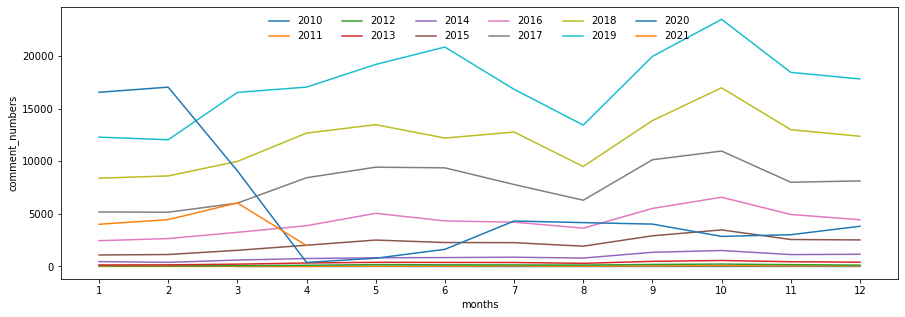

In [47]:
fig,ax = plt.subplots(figsize=(15,5))
for index in data2.index:
    line_data = data2.loc[index]
    line_data.dropna(inplace=True)
    sns.lineplot(x=line_data.index,y=line_data.values,ax=ax)
ax.legend(data2.index,ncol=len(data2.index)//2,frameon=False,loc="upper center")
ax.set_xticks(range(1,13))
ax.set_xlabel("months")
ax.set_ylabel("comment_numbers")
plt.show()

In [203]:
# 对data2_pre进行处理
data_ml2_pre_ = data2_pre.groupby(by=["years","months"]).size().to_frame().reset_index().rename(columns={0:"counts"})
    # 因为疫情原因，拿掉2020和2021年全年的数据
data_ml2 = data_ml2_pre_[data_ml2_pre_["years"]!=2021][data_ml2_pre_["years"]!=2020]
data_ml2

<ipython-input-203-162660a86af0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ml2 = data_ml2_pre_[data_ml2_pre_["years"]!=2021][data_ml2_pre_["years"]!=2020]


,years,months,counts
0,2010,3,2
1,2010,4,3
2,2010,5,5
3,2010,6,3
4,2010,7,1
...,...,...,...
113,2019,8,13436
114,2019,9,19969
115,2019,10,23488
116,2019,11,18449


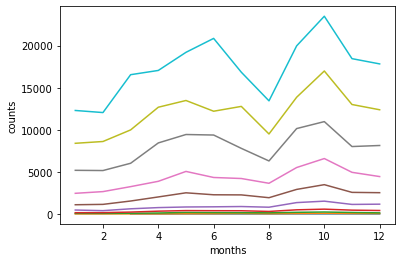

In [83]:
# 预测前先绘图
years = data_ml2_pre["years"].unique()
for year in years:
    data_ml2_pre_1 = data_ml2_pre[data_ml2_pre["years"]==year]
    sns.lineplot(x="months",y="counts",data=data_ml2_pre_1)

In [143]:
# features_target
features = data_ml2.drop("counts",axis=1)
target = data_ml2["counts"]
features.tail()

,years,months
113,2019,8
114,2019,9
115,2019,10
116,2019,11
117,2019,12


In [112]:
# 用随机森林预测
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25)
rfr = RandomForestRegressor(n_estimators=60)
rfr.fit(x_train,y_train)
predict = rfr.predict(x_test)
    # R2越接近1结果越好
print("r2",r2_score(y_test,predict))
print("mean_error",mean_absolute_error(y_test,predict))

r2 0.9702785931053974
mean_error 447.9766666666665


In [175]:
# 用linear回归预测
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25)
lr_ = LinearRegression()
lr_.fit(x_train,y_train)
predict = lr_.predict(x_test)
    # R2越接近1结果越好
print("r2",r2_score(y_test,predict))
print("mean_error",mean_absolute_error(y_test,predict))

r2 0.7436841986549161
mean_error 2562.560412351166


In [248]:
# 取2020年前两个月，预测其一整年的趋势
data_ml2_ =data_ml2_pre_[data_ml2_pre_["years"]!=2021].iloc[:-10]
data_ml2_
features = data_ml2_.drop("counts",axis=1)
target = data_ml2_["counts"]
features,target

(     years  months
 0     2010       3
 1     2010       4
 2     2010       5
 3     2010       6
 4     2010       7
 ..     ...     ...
 115   2019      10
 116   2019      11
 117   2019      12
 118   2020       1
 119   2020       2
 
 [120 rows x 2 columns],
 0          2
 1          3
 2          5
 3          3
 4          1
        ...  
 115    23488
 116    18449
 117    17825
 118    16555
 119    17043
 Name: counts, Length: 120, dtype: int64)

In [275]:
rfr = RandomForestRegressor()
rfr.fit(features,target)
ym_2020 = [[2023,x] for x in range(3,13)]
print(ym_2020)
y_predict_2020 = rfr.predict(ym_2020)
y_predict_2020

[[2023, 3], [2023, 4], [2023, 5], [2023, 6], [2023, 7], [2023, 8], [2023, 9], [2023, 10], [2023, 11], [2023, 12]]


array([16413.65, 17121.67, 18715.01, 19879.03, 17639.35, 15063.1 ,
       18447.28, 21971.31, 19746.12, 18835.68])

In [276]:
predict_dataframe_2020 = pd.DataFrame([[2020,x,y] for x,y in zip(list(range(3,13)),y_predict_2020)],columns=["years","months","counts"])
data_ml2_final = pd.concat([data_ml2_,predict_dataframe_2020]).reset_index().drop("index",axis=1)
data_ml2_final

,years,months,counts
0,2010,3,2.00
1,2010,4,3.00
2,2010,5,5.00
3,2010,6,3.00
4,2010,7,1.00
...,...,...,...
125,2020,8,15063.10
126,2020,9,18447.28
127,2020,10,21971.31
128,2020,11,19746.12


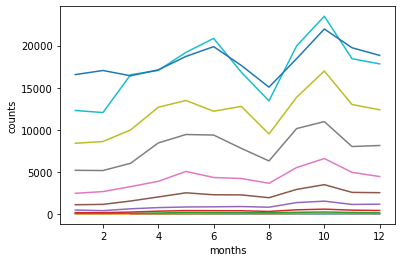

In [277]:
years = data_ml2_final["years"].unique()
for year in years:
    data_ml2_1= data_ml2_final[data_ml2_final["years"]==year]
    sns.lineplot(x="months",y="counts",data=data_ml2_1)